<a href="https://colab.research.google.com/github/JaledMC/Learning-Artificial-Vision/blob/master/histograms_HSV_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Histograms and HSV spectrum

With histograms, we can measure how many pixels meets certain value in the image, and identify features and global values of pixels on images, with x axis for the pixel value, and y axis for the quantity of pixels.

If you don't have the needed libraries installed, run the next block.

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip3 install -q -U opencv-python
!pip3 install -q matplotlib
!pip3 install -q numpy
!pip3 install -q requests

Import the libraries, and download the github images.

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from PIL import Image
import requests
from io import BytesIO

# import first image
response = requests.get('https://raw.githubusercontent.com/JaledMC/Learning-Artificial-Vision/master/images/origami.png')
img = Image.open(BytesIO(response.content))
img.save("origami.png")
bird = cv2.imread('origami.png')
bird2 = cv2.imread('origami.png')
# Convert second image to RGB spectrum
bird2 = cv2.cvtColor(bird2, cv2.COLOR_BGR2RGB)
# concatenate both
image = np.concatenate((bird, bird2), axis=1)
# Convert the result to gray spectrum
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

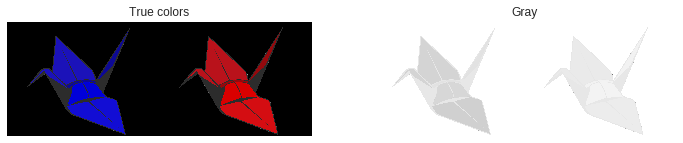

In [9]:
# Represent with matplotlib the image. We can obtain his pixel values and coordinates.
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(image)
axes[0].set_title('True colors')
axes[1].imshow(image_gray)
axes[1].set_title('Gray')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

## Histogram
Matplotlib has is own hist() function, which returns all points we need to graph it. Remember that x limit is the limit pixel value, 256. 

RGB images have three dimension, they are three matrix, and three histrogram, one for each channel, is needed.

Text(0.5,1,'BGR hist')

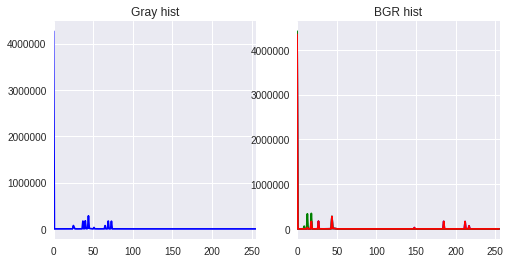

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# Obtain the histogram and store it in a variable. Params: image, channel. mask, BINcount, range
histr = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
axes[0].plot(histr, color = 'b') # we can select the graph color
axes[0].set_title('Gray hist')
axes[0].axis(xmin=0, xmax=256)

# With a loop, make one histogram for each channel and graph it with the proper color
color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image], [i], None, [256], [0, 256])
    axes[1].plot(histr, color = col)
axes[1].axis(xmin=0, xmax=256)
axes[1].set_title('BGR hist')

Most pixels have 0 value, because of the black background area. The small spikes represent the bird figures. Blue and red one are supposed to be blue and red bird. But what about green spikes? Well, in fact, **RGB spectrum it's not good for color segmentation.**

## Histogram equalization

For good segmentation, images with high contrast ara preferable. Histogram can be equalized for that.

In [0]:
# Original hist
histr = cv2.calcHist([image_gray], [0], None, [256], [0,256])
# Equalized hist
equal_histr = cv2.equalizeHist(image_gray)

[]

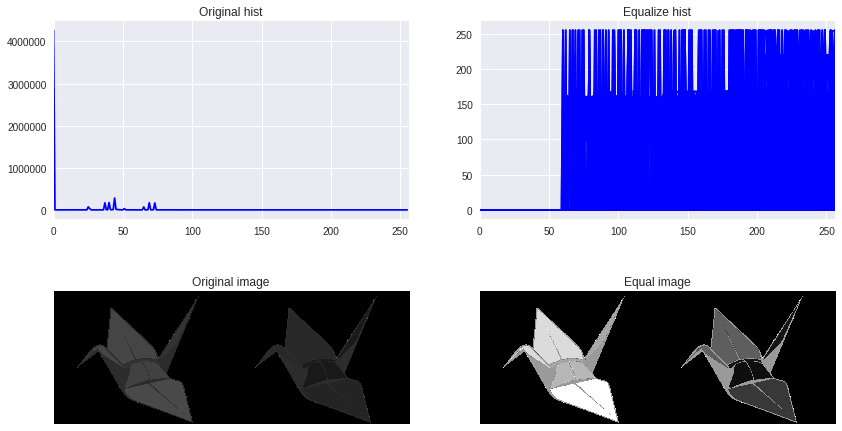

In [13]:
# Representation
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

axes[0][0].plot(histr,color = 'b')
axes[0][0].set_title('Original hist')
axes[0][0].axis(xmin=0, xmax=256)

axes[0][1].plot(equal_histr, color = 'b')
axes[0][1].set_title('Equalize hist')
axes[0][1].axis(xmin=0, xmax=256)

axes[1][0].imshow(image_gray, cmap='gray')
axes[1][0].set_title('Original image')
axes[1][1].imshow(equal_histr, cmap='gray')
axes[1][1].set_title('Equal image')

axes[1][0].set_xticks([])
axes[1][0].set_yticks([])
axes[1][1].set_xticks([])
axes[1][1].set_yticks([])

## HSV

HSV separtes hue in one channel, and color segmentation is easy with it. Hue range goes from 0 to 179, while saturation and value go to 255.

In [0]:
hsv = cv2.cvtColor(bird, cv2.COLOR_BGR2HSV)

We can represent each channel of an RGB image, but the same doesn't apply to HSV.

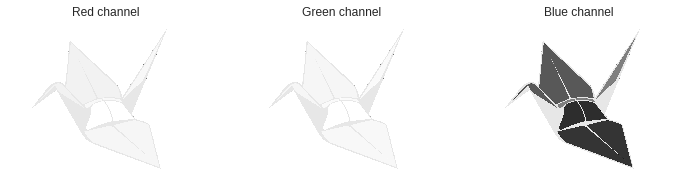

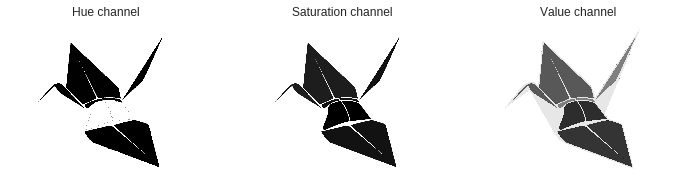

In [15]:
# Represent with matplotlib the image. We can obtain his pixel values and coordinates.
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
axes[0].imshow(bird[:, :, 0])
axes[0].set_title('Red channel')
axes[1].imshow(bird[:, :, 1])
axes[1].set_title('Green channel')
axes[2].imshow(bird[:, :, 2])
axes[2].set_title('Blue channel')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
axes[0].imshow(hsv[:, :, 0])
axes[0].set_title('Hue channel')
axes[1].imshow(hsv[:, :, 1])
axes[1].set_title('Saturation channel')
axes[2].imshow(hsv[:, :, 2])
axes[2].set_title('Value channel')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    

In the histogram of hue channel, we see only three spikes. The first for the background, and the others for the red and blue bird.

[]

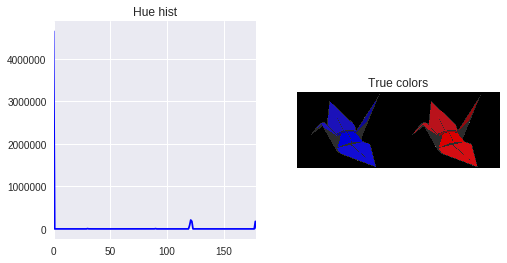

In [18]:
# Convert the image to hsv and extract only the hue channel
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue = hsv[:, :, 0]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# Obtain the histogram and store it in a variable. Params: image, channel. mask, BINcount, range
histr = cv2.calcHist([hue], [0], None, [180], [0, 179])
axes[0].plot(histr, color = 'b') # we can select the graph color
axes[0].set_title('Hue hist')
axes[0].axis(xmin=0, xmax=179)

axes[1].imshow(image)
axes[1].set_title('True colors');
axes[1].set_xticks([])
axes[1].set_yticks([])

## HSV segmentation

We want to select the red bird. Now we know how to use hsv to segment by color, but, what is the hue value of the red color? We can use a conversion function from rgb to hsv for that, or reference the hsv histogram spikes.

In [0]:
# We can obtain the HSV value picking one BGR color and using hsv transformation
def rgb2hsv(r, g, b):
  rgb = np.uint8([[[r, g, b]]])
  hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
  return int(hsv[0][0][0]), int(hsv[0][0][1]), int(hsv[0][0][2])

For the histogram we know that one bird is between 100 and 150 in hue channel. Use an inRange segmentation to obtain the mask and apply it.

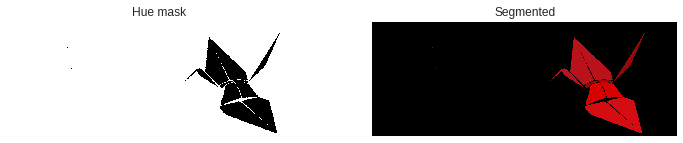

In [29]:
maskHSV = cv2.inRange(hue, 100, 150)
color_filtred = cv2.bitwise_and(image, image, mask = maskHSV)

# Represent with matplotlib the image. We can obtain his pixel values and coordinates.
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(maskHSV)
axes[0].set_title('Hue mask')
axes[1].imshow(color_filtred)
axes[1].set_title('Segmented')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])